In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm

Argumento

bla bla bla bla bla

analisis

Obtenciond de datos

In [2]:
df = pd.read_csv('datasets/taxi_api.csv')

In [3]:
df.drop(columns=['Unnamed: 0','datetime'], inplace=True)

In [4]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)

In [5]:
df.head(2)

,IdTaxis_2018,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,total_amount_1,foreing_key,temp,humidity,precip,snow,conditions
0,0,2018-01-01 00:21:05,2018-01-01 00:24:23,0.5,5.8,1-0,-12.6,55.55,0.0,0.0,Clear
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,2.7,15.3,1-0,-12.6,55.55,0.0,0.0,Clear


Crear la foreing key

In [6]:
# Dias
mask_dia = np.zeros((df.tpep_pickup_datetime.shape[0], 1))
for idx, i in enumerate(df.tpep_pickup_datetime):
    mask_dia[idx] =  str(i.strftime("%d"))#+"-"+i.strftime("%H")
    
mask_dia = mask_dia.sum(axis=1)
df['dia_hora'] = mask_dia
df.dia_hora = df.dia_hora.astype('str')

# Horas
mask_hora = np.zeros((df.tpep_pickup_datetime.shape[0], 1))
for idx, i in enumerate(df.tpep_pickup_datetime):
    mask_hora[idx] =  i.strftime("%H")
    
mask_hora = mask_hora.sum(axis=1)
df['hora'] = mask_hora
df['dia'] = mask_dia
df.hora = df.hora.astype('int')

#horas_dia
df.dia_hora = df.dia_hora + '-' + df.hora.astype('str')

In [7]:
df.head()

,IdTaxis_2018,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,total_amount_1,foreing_key,temp,humidity,precip,snow,conditions,dia_hora,hora,dia
0,0,2018-01-01 00:21:05,2018-01-01 00:24:23,0.5,5.80,1-0,-12.6,55.55,0.0,0.0,Clear,1.0-0,0,1.0
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,2.7,15.30,1-0,-12.6,55.55,0.0,0.0,Clear,1.0-0,0,1.0
2,2,2018-01-01 00:08:26,2018-01-01 00:14:21,0.8,8.30,1-0,-12.6,55.55,0.0,0.0,Clear,1.0-0,0,1.0
3,3,2018-01-01 00:09:18,2018-01-01 00:27:06,2.5,16.55,1-0,-12.6,55.55,0.0,0.0,Clear,1.0-0,0,1.0
4,4,2018-01-01 00:29:29,2018-01-01 00:32:48,0.5,5.80,1-0,-12.6,55.55,0.0,0.0,Clear,1.0-0,0,1.0


In [8]:
mask_dia_week = np.zeros((df.tpep_pickup_datetime.shape[0], 1))
for idx, i in enumerate(df.tpep_pickup_datetime):
    mask_dia_week[idx] =  i.weekday()#+"-"+i.strftime("%H")

#mask_dia_week = mask_dia.sum(axis=1)
df['WeekDay'] = mask_dia_week
#df.dia_hora = df.dia_hora.astype('str')

Crear nuevo data frame para las estadisticas

In [9]:
z = pd.DataFrame((df.groupby(['WeekDay']).size()))

In [10]:
z

,0
WeekDay,
0.0,1132466
1.0,1277453
2.0,1365989
3.0,991884
4.0,1135179
5.0,1115758
6.0,936459


In [11]:
z.values

array([[1132466],
       [1277453],
       [1365989],
       [ 991884],
       [1135179],
       [1115758],
       [ 936459]], dtype=int64)

In [12]:
z1 = z.reindex(['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])
z1

,0
WeekDay,
Lunes,NaN
Martes,NaN
Miercoles,NaN
Jueves,NaN
Viernes,NaN
Sabado,NaN
Domingo,NaN


<AxesSubplot:xlabel='WeekDay'>

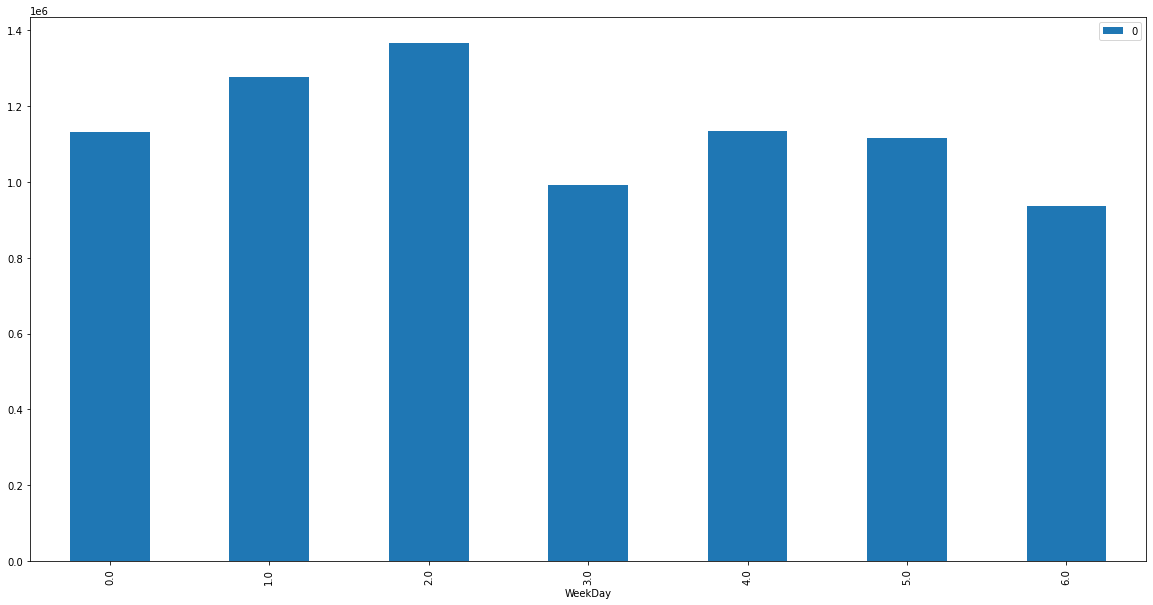

In [13]:
z.plot(kind='bar', figsize=(20,10))

In [14]:
d = pd.DataFrame((df.groupby(['dia_hora','hora']).size()))

In [15]:
d

,,0
dia_hora,hora,
1.0-0,0,15206
1.0-1,1,17342
1.0-10,10,5924
1.0-11,11,8743
1.0-12,12,10252
...,...,...
9.0-5,5,2343
9.0-6,6,7394
9.0-7,7,13293


In [16]:
statistics = pd.DataFrame(d.values, columns=['viajes_amount'])


In [17]:
statistics

,viajes_amount
0,15206
1,17342
2,5924
3,8743
4,10252
...,...
739,2343
740,7394
741,13293
742,16162


In [18]:
# get index from statistics
horas = np.zeros((d.values.shape[0],1))
for idx, i in enumerate(d.index):
    horas[idx] = i[1]

statistics['hora'] = horas

In [19]:
statistics[statistics.hora == 0]

,viajes_amount,hora
0,15206,0.0
24,4774,0.0
48,5508,0.0
72,7668,0.0
96,11767,0.0
120,15040,0.0
144,6340,0.0
168,3570,0.0
192,4937,0.0
216,5893,0.0


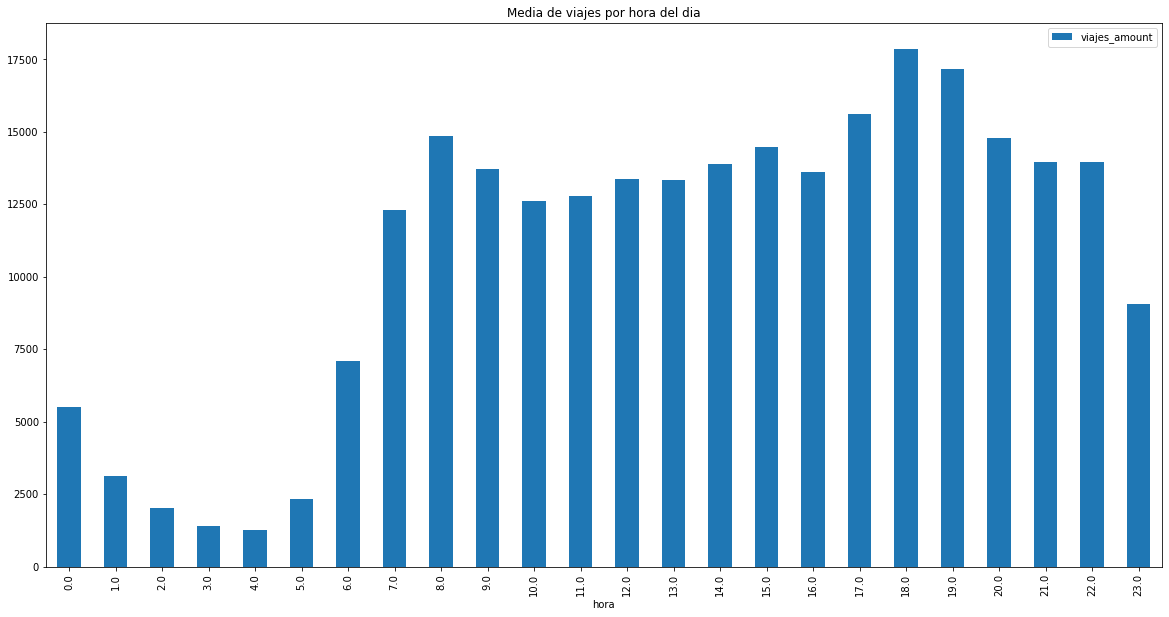

In [20]:
statistics.groupby('hora').median().plot(
    kind = "bar",
    figsize = (20,10), 
    title = "Media de viajes por hora del dia") 
plt.show()

Distribucion de viajes por hora

In [21]:
boxes = list(range(0,24))
h = list(range(0,24))

for i in boxes:
    boxes[i] = statistics.viajes_amount[statistics.hora == float(i)]

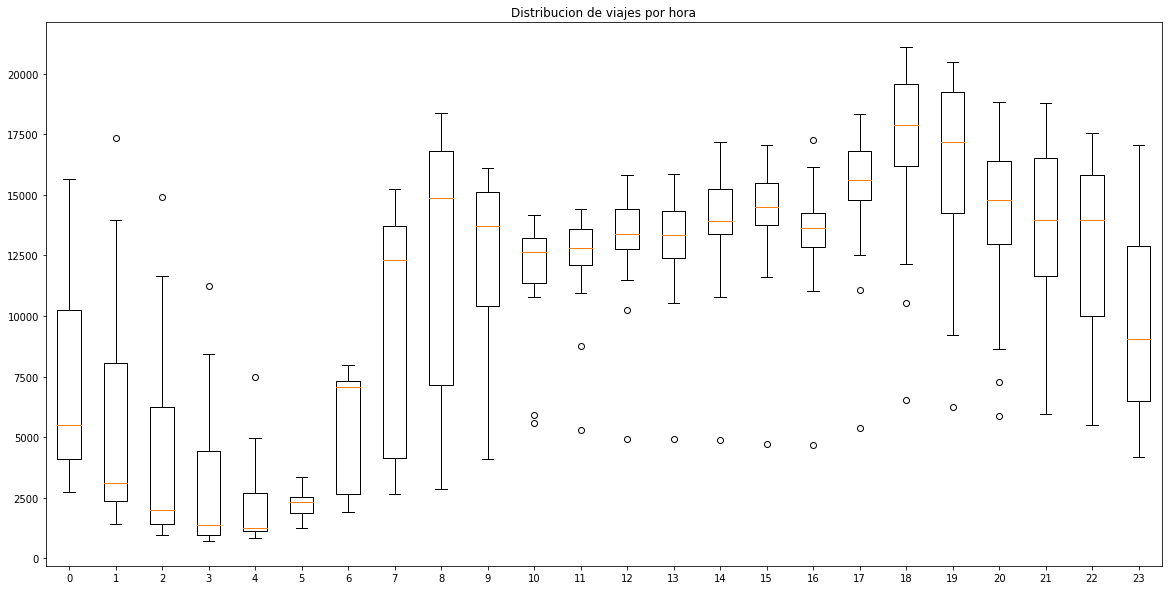

In [22]:
plt.figure(figsize=(20,10))
plt.boxplot(boxes)
plt.title('Distribucion de viajes por hora')
plt.xticks(list(range(1,25)), h)
plt.show()

In [23]:
df.groupby(['dia_hora','hora']).size().groupby('hora').median()

hora
0      5508.0
1      3107.0
2      2007.0
3      1389.0
4      1272.0
5      2343.0
6      7076.0
7     12301.0
8     14852.0
9     13708.0
10    12624.0
11    12787.0
12    13385.0
13    13351.0
14    13899.0
15    14492.0
16    13612.0
17    15623.0
18    17862.0
19    17177.0
20    14801.0
21    13972.0
22    13963.0
23     9042.0
dtype: float64

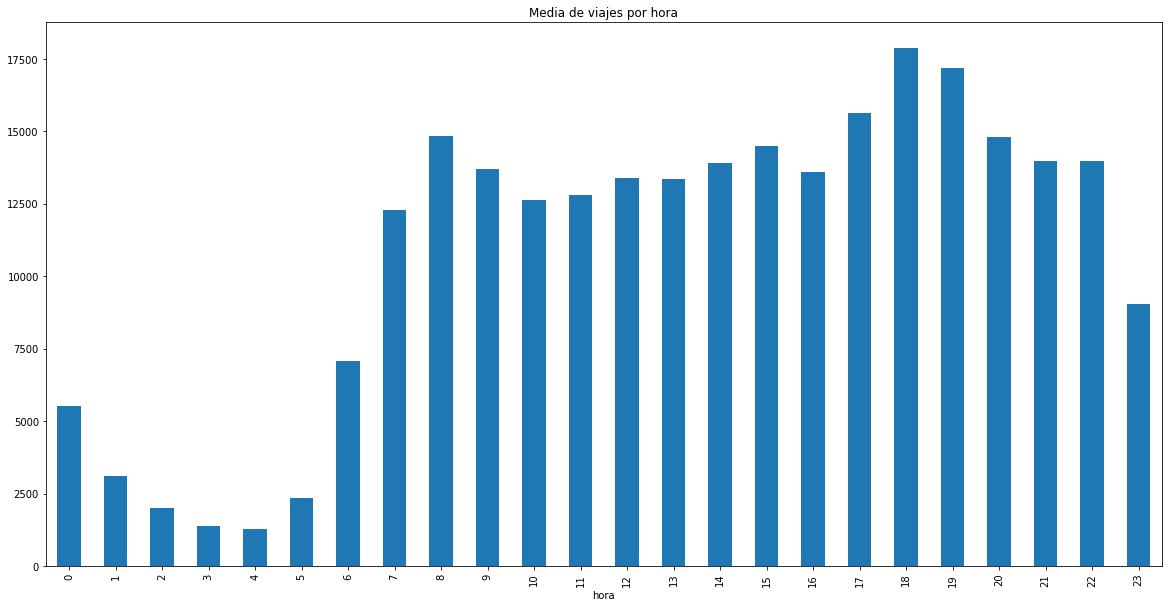

In [24]:
df.groupby(['dia_hora','hora']).size().groupby('hora').median().plot(
    kind = "bar",
    figsize = (20,10), 
    title = "Media de viajes por hora") 
plt.show()

Conclusiones

bla bla bla bla